**Nishank Dave**

**002747726**

**H2O AUTOML on Employee Attrition Dataset** 



**Abstract-**

1. What is the question?
2. What did you do?
3. What were the results?

We need to analyze the data to check the correlation, multicollinearity and significance between two variables. Then we'll use H2O AutoML library to train the data and predict 10 different models, finally print the best model's performance.

We need to address the following questions:

1)Is the relationship significant?

2)Are any model assumptions violated?

3)Is there any multicollinearity in the model?

4)In the multivariate models are predictor variables independent of all the other predictor variables?

5)In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

6)Does the model make sense?

7)Does regularization help?

8)Which independent variables are significant?

9)Which hyperparameters are important?

In [83]:
import pandas as pd

url = 'https://raw.githubusercontent.com/Nishank-NEU/Data-Science/main/walmartSample.csv'
df = pd.read_csv(url, encoding='unicode_escape')

In [84]:
df.head()



,Unnamed: 0,X,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,202017,202017,21,2011-02-25,False,36,1025.00,61.27,3.065,NaN,NaN,NaN,NaN,NaN,213.190421,8.028,B,140167
1,165520,165520,17,2012-03-02,False,31,1236.64,26.28,3.242,14469.08,1163.89,37.38,8771.3,2237.79,130.645793,6.403,B,93188
2,389207,389207,41,2011-12-02,False,94,37971.00,34.53,3.378,4594.56,305.47,1781.24,3168.1,21739.26,195.822329,6.759,A,196321
3,133193,133193,14,2011-05-06,False,67,26400.02,58.21,4.046,NaN,NaN,NaN,NaN,NaN,185.937438,8.521,A,200898
4,401356,401356,43,2010-10-08,False,1,8748.54,72.81,2.633,NaN,NaN,NaN,NaN,NaN,203.665179,10.210,C,41062


In [85]:
df.describe()

,Unnamed: 0,X,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,170.000000,125.000000,155.000000,154.000000,172.000000,500.000000,500.000000,500.000000
mean,210530.526000,210530.526000,22.130000,43.566000,15464.517940,60.834100,3.355510,7078.752294,2412.817120,3460.453806,3067.436818,4762.213488,170.958683,7.856342,133242.576000
std,123953.839618,123953.839618,13.018451,30.151416,22670.486915,18.007267,0.467349,7321.494836,5563.719396,14725.582805,5514.412473,4503.031418,38.966870,1.705760,61115.483536
min,309.000000,309.000000,1.000000,1.000000,0.990000,6.230000,2.514000,0.270000,-0.910000,-0.870000,1.500000,170.640000,126.064000,4.125000,34875.000000
25%,106939.000000,106939.000000,11.000000,19.000000,2054.230000,47.990000,2.909000,2698.030000,65.000000,4.420000,554.447500,1978.842500,132.106200,6.887500,93188.000000
50%,208623.500000,208623.500000,22.000000,36.000000,6990.795000,63.130000,3.448500,5566.535000,197.720000,25.940000,1432.550000,3507.195000,182.386625,7.796500,128107.000000
75%,312257.000000,312257.000000,32.000000,71.250000,18760.335000,74.160000,3.743250,8673.122500,1163.890000,143.420000,3466.392500,6113.865000,211.957725,8.515000,202505.000000
max,422277.000000,422277.000000,45.000000,99.000000,225156.090000,94.870000,4.468000,53423.290000,30876.790000,83340.330000,57817.560000,28238.930000,227.214288,14.313000,219622.000000


In [86]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    500 non-null    int64  
 1   X             500 non-null    int64  
 2   Store         500 non-null    int64  
 3   Date          500 non-null    object 
 4   IsHoliday     500 non-null    bool   
 5   Dept          500 non-null    int64  
 6   Weekly_Sales  500 non-null    float64
 7   Temperature   500 non-null    float64
 8   Fuel_Price    500 non-null    float64
 9   MarkDown1     170 non-null    float64
 10  MarkDown2     125 non-null    float64
 11  MarkDown3     155 non-null    float64
 12  MarkDown4     154 non-null    float64
 13  MarkDown5     172 non-null    float64
 14  CPI           500 non-null    float64
 15  Unemployment  500 non-null    float64
 16  Type          500 non-null    object 
 17  Size          500 non-null    int64  
dtypes: bool(1), float64(10), int64

Unnamed: 0        0
X                 0
Store             0
Date              0
IsHoliday         0
Dept              0
Weekly_Sales      0
Temperature       0
Fuel_Price        0
MarkDown1       330
MarkDown2       375
MarkDown3       345
MarkDown4       346
MarkDown5       328
CPI               0
Unemployment      0
Type              0
Size              0
dtype: int64

In [87]:
!pip install h2o
%matplotlib inline
import random, os, sys
import h2o
import pandas
import pprint
import logging
import operator
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
from tabulate import tabulate
from h2o.automl import H2OAutoML
from datetime import datetime
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [88]:
import pandas as pd
import seaborn as sns

In [89]:
df[['MarkDown1','MarkDown2','MarkDown3','MarkDown4', 'MarkDown5']] = df[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].fillna(0)
df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Week'] = pd.to_datetime(df['Date']).dt.isocalendar().week
df = df.drop(columns=["Date", "CPI", "Fuel_Price", 'Unemployment', 'Temperature'])

In [90]:
df.isnull().sum()

Unnamed: 0      0
X               0
Store           0
IsHoliday       0
Dept            0
Weekly_Sales    0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
Type            0
Size            0
Year            0
Month           0
Week            0
dtype: int64

## Is there any multicollinearity in the model?

Yes,we can see there are lot of co-relation among the variables. The co-relation between Energy and Loudness (db) being the highest (0.74), it may mean that essentially both are measuring or predicting same thing


<AxesSubplot:>

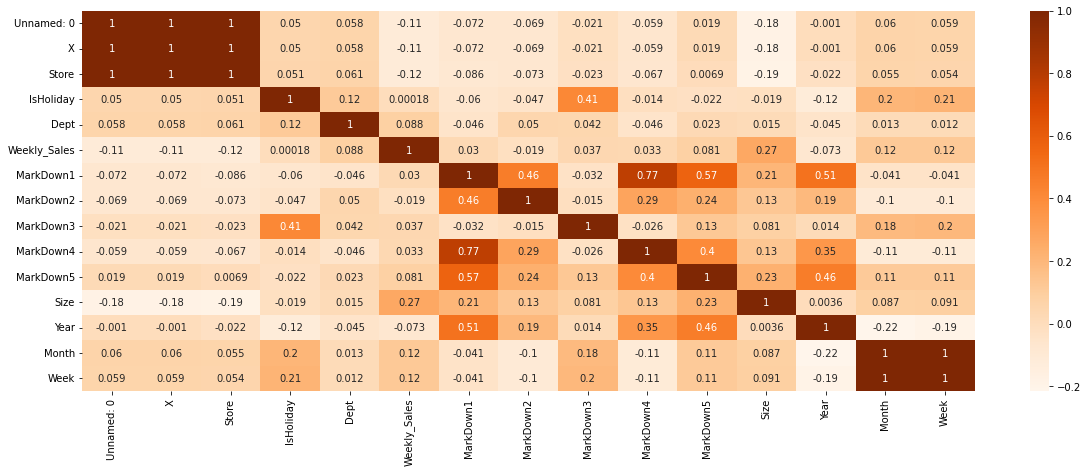

In [91]:
#the heat map of the correlation
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(), annot=True, cmap='Oranges')

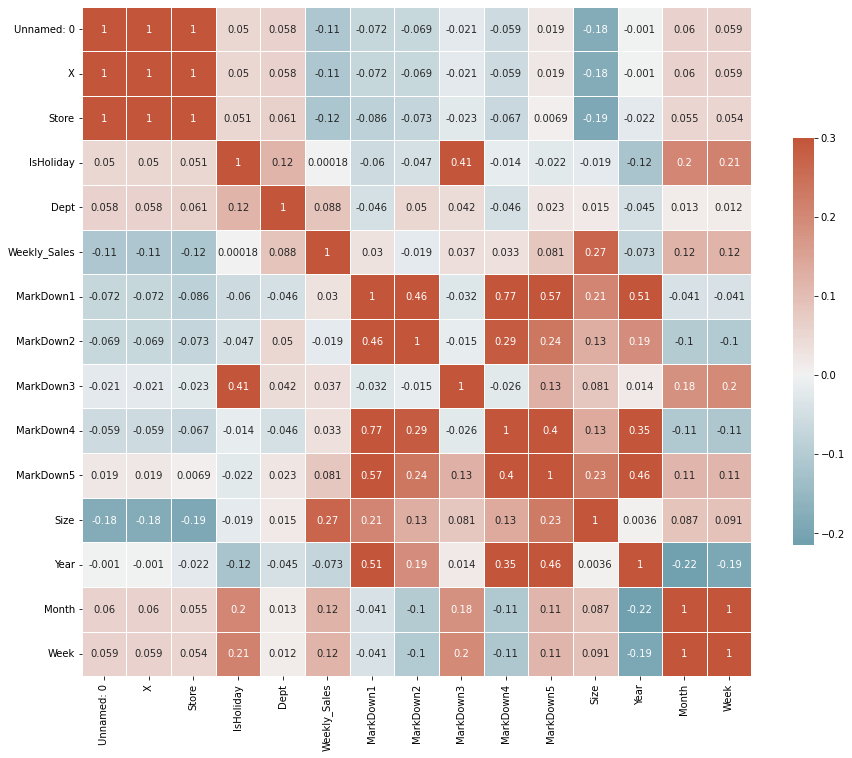

In [92]:
#Input Variables Correlation with the output feature Weekly_Sales
corr = df.corr()
f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={'shrink': .5})
plt.show()

In [93]:
df.corr()

,Unnamed: 0,X,Store,IsHoliday,Dept,Weekly_Sales,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Size,Year,Month,Week
Unnamed: 0,1.000000,1.000000,0.999173,0.050196,0.058352,-0.113670,-0.072212,-0.069389,-0.020834,-0.059409,0.018600,-0.179642,-0.001025,0.060106,0.059374
X,1.000000,1.000000,0.999173,0.050196,0.058352,-0.113670,-0.072212,-0.069389,-0.020834,-0.059409,0.018600,-0.179642,-0.001025,0.060106,0.059374
Store,0.999173,0.999173,1.000000,0.050821,0.060730,-0.115084,-0.085914,-0.072944,-0.023343,-0.066878,0.006916,-0.189864,-0.021568,0.055466,0.054396
IsHoliday,0.050196,0.050196,0.050821,1.000000,0.116840,0.000177,-0.059756,-0.046508,0.412287,-0.014207,-0.022270,-0.019388,-0.119219,0.204384,0.212128
Dept,0.058352,0.058352,0.060730,0.116840,1.000000,0.087581,-0.045784,0.049529,0.041947,-0.046283,0.023140,0.015167,-0.045064,0.012819,0.012442
Weekly_Sales,-0.113670,-0.113670,-0.115084,0.000177,0.087581,1.000000,0.029583,-0.018534,0.037326,0.033142,0.080731,0.267252,-0.072724,0.120521,0.118411
MarkDown1,-0.072212,-0.072212,-0.085914,-0.059756,-0.045784,0.029583,1.000000,0.462294,-0.031843,0.773979,0.569172,0.206882,0.505342,-0.040836,-0.041148
MarkDown2,-0.069389,-0.069389,-0.072944,-0.046508,0.049529,-0.018534,0.462294,1.000000,-0.014526,0.287351,0.235047,0.130179,0.190230,-0.102478,-0.104739
MarkDown3,-0.020834,-0.020834,-0.023343,0.412287,0.041947,0.037326,-0.031843,-0.014526,1.000000,-0.026022,0.125510,0.080929,0.014200,0.184352,0.195533
MarkDown4,-0.059409,-0.059409,-0.066878,-0.014207,-0.046283,0.033142,0.773979,0.287351,-0.026022,1.000000,0.404992,0.134902,0.345618,-0.108440,-0.110841


In [94]:
from sklearn.model_selection import  train_test_split

X = df[ ['Store', 'Dept','Size', 'Year', 'Month']].replace(',', '', regex = True).astype(float)

y = df['Weekly_Sales']

#Spliting data into Training set, Validation set and Test set 20%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

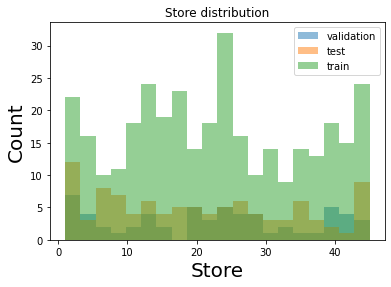

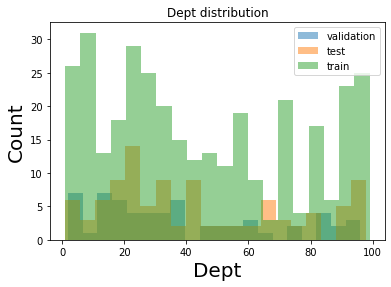

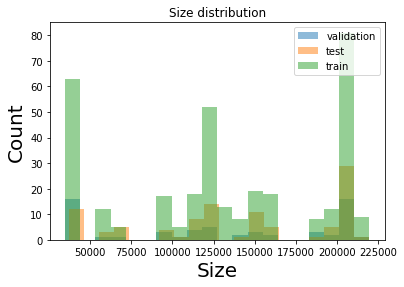

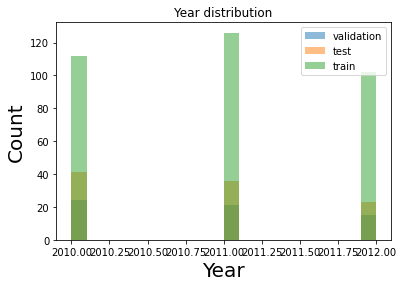

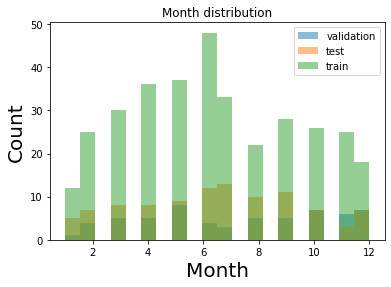

In [95]:
# Looking the data for test, training and validation set
X_test_plot = X_test[['Store', 'Dept','Size', 'Year', 'Month']]

X_val_plot = X_val[['Store', 'Dept','Size', 'Year', 'Month']]

X_train_plot = X_train[['Store', 'Dept','Size', 'Year', 'Month']]

# Plotting the data to see the histogram
import matplotlib.pyplot as plt
for c in X_test_plot.columns:
  fig, ax = plt.subplots(figsize=(6,4))
  ax.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
  ax.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
  ax.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
  ax.set_xlabel(c, size=20)
  ax.set_ylabel("Count", size=20)
  ax.legend(loc='upper right')
  ax.set_title("{} distribution".format(c))
  plt.show()

In [96]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(df['Weekly_Sales'], df[['Store', 'Dept','Size', 'Year', 'Month']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           Weekly_Sales   R-squared (uncentered):                   0.382
Model:                            OLS   Adj. R-squared (uncentered):              0.376
Method:                 Least Squares   F-statistic:                              61.20
Date:                Wed, 01 Mar 2023   Prob (F-statistic):                    1.29e-49
Time:                        04:49:07   Log-Likelihood:                         -5698.7
No. Observations:                 500   AIC:                                  1.141e+04
Df Residuals:                     495   BIC:                                  1.143e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Store       -139.5917     76.249     -1.831      0.068    -289.402      10.219
Dept          65.7827     32.241      2.040      0.042       2.437     129.128
Size           0.0897      0.016      5.520      0.000       0.058       0.122
Year          -0.5920      1.876     -0.316      0.752      -4.279       3.094
Month        755.0849    316.030      2.389      0.017     134.159    1376.011
==============================================================================
Omnibus:                      396.554   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8676.288
Skew:                           3.295   Prob(JB):                         0.00
Kurtosis:                      22.314   Cond. No.                     4.78e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#H2O starts
 Init is used to initialize H2O library.



In [97]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no = random.randint(5555, 55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
    h2o.init()  # start h2o
except:
    h2o.cluster().shutdown()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,1 hour 1 min
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.1
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_unknownUser_170i9r
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.996 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [98]:
df_copy=df.copy()

We can even split the H2O dataframe

In [99]:
df = h2o.H2OFrame(df_copy)
df_train, df_test = df.split_frame([0.75])
print(df_train)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
  Unnamed: 0       X    Store  IsHoliday      Dept    Weekly_Sales    MarkDown1    MarkDown2    MarkDown3    MarkDown4    MarkDown5  Type      Size    Year    Month    Week
      202017  202017       21  False            36         1025            0            0            0            0            0     B       140167    2011        2       8
      165520  165520       17  False            31         1236.64     14469.1       1163.89        37.38      8771.3       2237.79  B        93188    2012        3       9
      133193  133193       14  False            67        26400            0            0            0            0            0     A       200898    2011        5      18
      401356  401356       43  False             1         8748.54         0            0            0            0            0     C        41062    2010       10      40
      259159  259159       27  False    

Here we specify the predictor variable and the respecitive features

In [100]:
x = df.columns
y = 'Weekly_Sales'
x = x.remove(y)

In [101]:
aml = H2OAutoML(max_models=25, balance_classes=True, seed=1) 
aml.train(x = x, y = y, training_frame = df_train)

AutoML progress: |███████████████
04:49:20.698: DeepLearning_1_AutoML_3_20230301_44908 [DeepLearning def_1] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for DeepLearning model: DeepLearning_1_AutoML_3_20230301_44908_cv_1.  Details: ERRR on field: _balance_classes: balance_classes requires classification.


████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_3_20230301_44908_model_16


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    31                 31                          12609                  7            7            7             13            40            27.6774

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 107402100.67307214
RMSE: 10363.49847653157
MAE: 5873.4420657786695
RMSLE: NaN
Mean Residual Deviance: 107402100.67307214

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 437630732.9175157
RMSE: 20919.625544390503
MAE: 11678.676379092527
RMSLE: NaN
Mean Residual Deviance: 437630732.9175157

Cross-Validation Metrics Summary: 
                        mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     11655.7      1510.65      11872.6       10146.2       10660.9       11535.4       14063.7
mean_residual_deviance  4.42912e+08  2.65942e+08  3.75272e+08   3.03498e+08   2.30415e+08   4.01964e+08   9.0341e+08
mse                     4.42912e+08  2.65942e+08  3.75272e+08   3.03498e+08   2.30415e+08   4.01964e+08   9.0341e+08
r2                      0.20045      0.185705     0.359583      0.37675       -0.0571107    0.239521      0.0835065
residual_deviance       4.42912e+08  2.65942e+08  3.75272e+08   3.03498e+08   2.30415e+08   4.01964e+08   9.0341e+08
rmse                    20415.7      5713.14      19371.9       17421.2       15179.4       20049         30056.8
rmsle                   2.00136      0.279369     1.71095       nan           2.26819       nan           2.02496

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2023-03-01 04:49:32  5.966 sec   0                  23793.9          15290.9         5.66152e+08
    2023-03-01 04:49:32  5.995 sec   5                  19449.4          12209.4         3.7828e+08
    2023-03-01 04:49:32  6.012 sec   10                 16168            9756.37         2.61404e+08
    2023-03-01 04:49:32  6.033 sec   15                 13832.2          7914.46         1.9133e+08
    2023-03-01 04:49:32  6.054 sec   20                 12520.2          7008.03         1.56757e+08
    2023-03-01 04:49:32  6.071 sec   25                 11339.3          6349.8          1.2858e+08
    2023-03-01 04:49:33  6.088 sec   30                 10505.5          5934.18         1.10365e+08
    2023-03-01 04:49:33  6.091 sec   31                 10363.5          5873.44         1.07402e+08

Variable Importances: 
variable    relative_importance    scaled_importance    percentage
----------  ---------------------  -------------------  ------------
Dept        4.1643e+11             1                    0.473825
Size        8.73386e+10            0.209732             0.0993762
Week        8.37219e+10            0.201047             0.095261
X           7.78697e+10            0.186993             0.0886022
Unnamed: 0  6.73218e+10            0.161664             0.0766006
Month       3.9708e+10             0.0953533            0.0451808
Store       3.19156e+10            0.0766411            0.0363145
Type        3.09961e+10            0.0744329            0.0352682
Year        1.25528e+10            0.0301439            0.014283
IsHoliday   9.33806e+09            0.0224241            0.0106251
MarkDown5   9.2006e+09             0.022094             0.0104

Here we can see that Stacked ensemble model is performing better than any of the models.

In [102]:
best_model = aml.leaderboard
print(best_model)

model_id                                                   rmse          mse      mae      rmsle    mean_residual_deviance
GBM_grid_1_AutoML_3_20230301_44908_model_16             20919.6  4.37631e+08  11678.7  nan                     4.37631e+08
StackedEnsemble_BestOfFamily_1_AutoML_3_20230301_44908  21091.2  4.44837e+08  12155      2.00036               4.44837e+08
StackedEnsemble_AllModels_1_AutoML_3_20230301_44908     21180.3  4.48603e+08  12271.8    1.96064               4.48603e+08
GBM_grid_1_AutoML_3_20230301_44908_model_21             21209.2  4.49832e+08  12378.4  nan                     4.49832e+08
GBM_grid_1_AutoML_3_20230301_44908_model_2              21294.6  4.53461e+08  12147.5  nan                     4.53461e+08
GBM_grid_1_AutoML_3_20230301_44908_model_9              21381.1  4.57153e+08  12675.3  nan                     4.57153e+08
GBM_4_AutoML_3_20230301_44908                           21447.3  4.59986e+08  12810.4  nan                     4.59986e+08
XGBoost_3_AutoML

In [103]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head() 

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
GBM_grid_1_AutoML_3_20230301_44908_model_16,20919.6,4.37631e+08,11678.7,nan,4.37631e+08
StackedEnsemble_BestOfFamily_1_AutoML_3_20230301_44908,21091.2,4.44837e+08,12155,2.00036,4.44837e+08
StackedEnsemble_AllModels_1_AutoML_3_20230301_44908,21180.3,4.48603e+08,12271.8,1.96064,4.48603e+08
GBM_grid_1_AutoML_3_20230301_44908_model_21,21209.2,4.49832e+08,12378.4,nan,4.49832e+08
GBM_grid_1_AutoML_3_20230301_44908_model_2,21294.6,4.53461e+08,12147.5,nan,4.53461e+08
GBM_grid_1_AutoML_3_20230301_44908_model_9,21381.1,4.57153e+08,12675.3,nan,4.57153e+08
GBM_4_AutoML_3_20230301_44908,21447.3,4.59986e+08,12810.4,nan,4.59986e+08
XGBoost_3_AutoML_3_20230301_44908,21542.1,4.64062e+08,12278.7,nan,4.64062e+08
GBM_3_AutoML_3_20230301_44908,21618,4.67337e+08,12858.5,nan,4.67337e+08
GBM_2_AutoML_3_20230301_44908,21623.5,4.67577e+08,12940.5,nan,4.67577e+08


In [104]:
best_model = aml.leader
best_model.model_performance(df_test)

ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 210988582.48154825
RMSE: 14525.446033824512
MAE: 9120.847457710404
RMSLE: 1.7839398191951648
Mean Residual Deviance: 210988582.48154825

## The importance of every variables

In multivariate models rank the most significant predictor variables and exclude insignificant ones from the model

Which independent variables are significant?

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

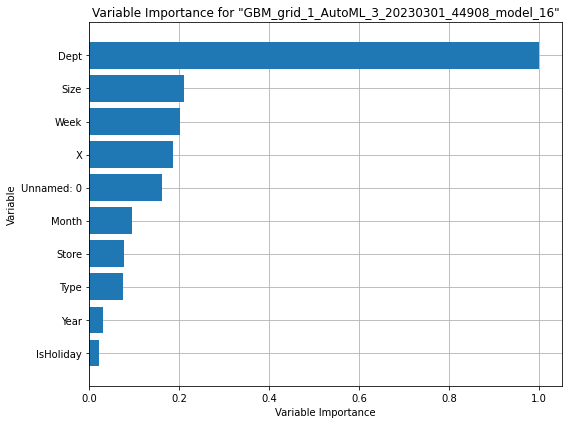

In [105]:
%matplotlib inline
#best_model.varimp_plot()
explain_model = aml.explain(frame = df_test, figsize = (8,6),include_explanations=['varimp' ])

## Regularization

Regularization is indeed a set of techniques used in machine learning to prevent overfitting, which is when a model fits the training data too well and does not generalize well to new data. Regularization achieves this by adding a penalty term to the loss function that the model optimizes. This penalty term encourages the model to have simpler weights or smaller coefficients, which makes it less likely to overfit.

L1 and L2 regularization are two common types of regularization. L1 regularization adds a penalty term to the loss function that is proportional to the absolute value of the weights (i.e., the magnitude of the coefficients). L2 regularization adds a penalty term that is proportional to the square of the weights. This means that L2 regularization tends to spread the weight values out more evenly across all the features, while L1 regularization tends to push some of the weight values to zero, effectively performing feature selection.

In terms of outliers, it is true that L2 regularization can be more sensitive to outliers than L1 regularization, because L2 regularization squares the weights, which can amplify the effect of large weight values. However, this does not necessarily mean that L1 regularization is always better in the presence of outliers. In some cases, L2 regularization may still perform well if the outliers are not too extreme or if the dataset is large enough to absorb their effects. It also depends on the specific problem and the characteristics of the data. In general, it's a good idea to try both L1 and L2 regularization and see which one works better for your particular problem.




### * Does regularization help?
 Ridge is better
 

In [106]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

Weekly_Sales_glm = H2OGeneralizedLinearEstimator(
    family="gaussian", lambda_=0.0001, compute_p_values=True, nfolds=5, remove_collinear_columns = True
)  # Elastic Net Regularization
Weekly_Sales_glm_regularization_ridge = H2OGeneralizedLinearEstimator(
    family="gaussian", alpha=0, nfolds=5, remove_collinear_columns = True
)  # RIDGE Regularization
Weekly_Sales_glm_regularization_lasso = H2OGeneralizedLinearEstimator(
    family="gaussian", alpha=1, nfolds=5, remove_collinear_columns = True
)  # LASSO Regularization
Weekly_Sales_glm_regularization_lambda_search = H2OGeneralizedLinearEstimator(
    lambda_search=True, remove_collinear_columns = True
)  # Lambda Search

In [107]:
Weekly_Sales_glm.train(x=x, y=y, training_frame=df_train)

glm Model Build progress: |

/usr/local/lib/python3.8/dist-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: remove_collinear_columns should only be used with no regularization, i.e. lambda=0.0.  It is used improperly here.  Please set lambda=0.
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████████| (done) 100%


,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
,gaussian,identity,"Elastic Net (alpha = 0.5, lambda = 1.0E-4 )",18,15,1,py_506_sid_abea
,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,14480.849,2883.5688,12734.47,14900.349,10996.268,18663.75,15109.409
mean_residual_deviance,545837890.0000000,370053504.0000000,371991552.0000000,513468384.0000000,242986416.0000000,1184555260.0000000,416187712.0000000
mse,545837890.0000000,370053504.0000000,371991552.0000000,513468384.0000000,242986416.0000000,1184555260.0000000,416187712.0000000
null_deviance,41462051000.0000000,23406438400.0000000,28474857500.0000000,36691866000.0000000,23430901800.0000000,82099356000.0000000,36613259000.0000000
r2,0.0756969,0.1207232,0.1630386,0.0478002,0.2339072,-0.0089225,-0.0573393
residual_deviance,38976831000.0000000,24633389100.0000000,23807459300.0000000,34915852000.0000000,17738008600.0000000,80549757000.0000000,37873082000.0000000
rmse,22470.598,7151.0547,19287.082,22659.842,15588.021,34417.367,20400.68
rmsle,2.0198698,0.0,nan,2.0198698,nan,nan,nan


## Ridge Regularization

In [108]:
Weekly_Sales_glm_regularization_ridge.train(x=x, y=y, training_frame=df_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
,gaussian,identity,Ridge ( lambda = 6.0431 ),18,15,1,py_506_sid_abea
,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,14898.445,384.6466,15123.239,14516.27,14777.293,15451.084,14624.339
mean_residual_deviance,556036860.0000000,179849312.0000000,620511870.0000000,342159264.0000000,534228128.0000000,462268352.0000000,821016640.0000000
mse,556036860.0000000,179849312.0000000,620511870.0000000,342159264.0000000,534228128.0000000,462268352.0000000,821016640.0000000
null_deviance,41437106000.0000000,15878570000.0000000,53479334000.0000000,21229963300.0000000,42262970000.0000000,30485426200.0000000,59727831000.0000000
r2,-0.0250494,0.1632659,0.0813424,-0.3115278,0.0751596,0.0139019,0.0158767
residual_deviance,40361222000.0000000,12958829600.0000000,47779414000.0000000,26688423900.0000000,38998655000.0000000,30047442900.0000000,58292183000.0000000
rmse,23334.963,3794.135,24910.076,18497.547,23113.375,21500.426,28653.389
rmsle,2.2542987,0.0,nan,nan,nan,nan,2.2542987


## Lasso Regularization

In [109]:
Weekly_Sales_glm_regularization_lasso.train(x=x, y=y, training_frame=df_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
,gaussian,identity,Lasso (lambda = 6.0431 ),18,15,1,py_506_sid_abea
,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,14980.325,2373.2412,13275.685,17517.227,16999.486,15142.875,11966.357
mean_residual_deviance,572180220.0000000,298444608.0000000,349139488.0000000,727680900.0000000,1019723900.0000000,452365152.0000000,311991680.0000000
mse,572180220.0000000,298444608.0000000,349139488.0000000,727680900.0000000,1019723900.0000000,452365152.0000000,311991680.0000000
null_deviance,41427231000.0000000,22794555400.0000000,31468216300.0000000,42384933000.0000000,80469082000.0000000,25227020300.0000000,27586895900.0000000
r2,-0.0071243,0.1031659,0.0276444,0.0217593,0.0494172,-0.1899190,0.0554766
residual_deviance,40286302000.0000000,20440074200.0000000,30375135200.0000000,40750129000.0000000,75459568000.0000000,28951369700.0000000,25895309300.0000000
rmse,23305.223,6025.654,18685.275,26975.56,31933.117,21268.877,17663.285
rmsle,2.2492607,0.0,nan,nan,2.2492607,nan,nan


In [110]:
lambda_search = Weekly_Sales_glm_regularization_lambda_search.train(
    x=x, y=y, training_frame=df_train
)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.8/dist-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: remove_collinear_columns should only be used with no regularization, i.e. lambda=0.0.  It is used improperly here with lambda_search.  Please disable lambda_search and set lambda=0.
  warnings.warn(mesg["message"], RuntimeWarning)


In [111]:
lambda_search

Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1677642441433_76


GLM Model: summary
    family    link      regularization                                lambda_search                                                                 number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  --------------------------------------------  ----------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Elastic Net (alpha = 0.5, lambda = 11013.0 )  nlambda = 100, lambda.max = 12086.0, lambda.min = 11013.0, lambda.1se = -1.0  18                            1                              2                       py_506_sid_abea

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 529531748.31363803
RMSE: 23011.556842457183
MAE: 14123.545864236741
RMSLE: 2.1557061241666924
Mean Residual Deviance: 529531748.31363803
R^2: 0.06468250997529656
Null degrees of freedom: 363
Residual degrees of freedom: 362
Null deviance: 206079281572.15747
Residual deviance: 192749556386.16425
AIC: 8350.838591784715

Scoring History: 
    timestamp            duration    iteration    lambda    predictors    deviance_train    alpha    iterations    training_rmse       training_deviance    training_mae        training_r2
--  -------------------  ----------  -----------  --------  ------------  ----------------  -------  ------------  ------------------  -------------------  ------------------  -------------------
    2023-03-01 04:49:46  0.000 sec   1            12000     1             5.66152e+08       0.5
    2023-03-01 04:49:46  0.006 sec   2            11000     2             5.29532e+08       0.5
    2023-03-01 04:49:46  0.006 sec   3            10000     2             5.29532e+08       0.5
    2023-03-01 04:49:46  0.007 sec   4            9100      2             5.29532e+08       0.5
    2023-03-01 04:49:46  0.008 sec   5            8300      2             5.29532e+08       0.5
    2023-03-01 04:49:46  0.010 sec   6            7600      2             5.29532e+08       0.5
    2023-03-01 04:49:46  0.011 sec   7            6900      2             5.29532e+08       0.5      7             23011.556842457183  529531748.31363803   14123.545864236741  0.06468250997529656

Variable Importances: 
variable         relative_importance    scaled_importance    percentage
---------------  ---------------------  -------------------  ------------
Size             6059.79                1                    1
Type.A           0                      0                    0
Type.B           0                      0                    0
Type.C           0                      0                    0
IsHoliday.False  0                      0                    0
IsHoliday.True   0                      0                    0
Unnamed: 0       0                      0                    0
X                0                      0                    0
Store            0                      0                    0
Dept             0                      0                    0
MarkDown1        0                      0                    0
MarkDown2        0                      0                    0
MarkDown3        0                      0                    0
MarkDown4        0                      0                    0
MarkDown5        0                      0                    0
Year             0                      0                    0
Month            0                      0                    0
Week             0                      0                    0

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [112]:
coeff_table = Weekly_Sales_glm._model_json["output"]["coefficients_table"]

In [113]:
coeff_table.as_data_frame()  # Z-Value and P-Value showing the significance of each attributes.

,names,coefficients,std_error,z_value,p_value,standardized_coefficients
0,Intercept,4.010500e+06,4.842726e+06,0.828149,0.408154,16387.676473
1,Type.A,-4.172603e+03,7.261828e+03,-0.574594,0.565937,-4172.603164
2,Type.B,1.519835e+00,5.489012e+03,0.000277,0.999779,1.519835
3,Type.C,0.000000e+00,NaN,NaN,NaN,0.000000
4,IsHoliday.False,1.404234e+03,4.880114e+03,0.287746,0.773712,1404.233649
5,IsHoliday.True,0.000000e+00,NaN,NaN,NaN,0.000000
6,Unnamed: 0,9.945998e-02,3.229294e-01,0.307993,0.758272,12169.820303
7,X,0.000000e+00,NaN,NaN,NaN,0.000000
8,Store,-1.071375e+03,3.102650e+03,-0.345310,0.730070,-13744.465769
9,Dept,9.597107e+01,4.114636e+01,2.332432,0.020248,2923.385592


Are any model assumptions violated?
Residual  Analysis

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_BestOfFamily_1_AutoML_3_20230301_44908,14238.2,2.02725e+08,9318.52,1.89344,2.02725e+08,496,0.027977,StackedEnsemble
GBM_5_AutoML_3_20230301_44908,14456.7,2.08996e+08,9128.6,1.86348,2.08996e+08,125,0.025625,GBM
StackedEnsemble_AllModels_1_AutoML_3_20230301_44908,14524.2,2.10952e+08,9286.57,1.85708,2.10952e+08,1086,0.082761,StackedEnsemble
GBM_grid_1_AutoML_3_20230301_44908_model_16,14525.4,2.10989e+08,9120.85,1.78394,2.10989e+08,127,0.014287,GBM
GBM_4_AutoML_3_20230301_44908,14779.5,2.18433e+08,9799.08,nan,2.18433e+08,229,0.010955,GBM
XGBoost_grid_1_AutoML_3_20230301_44908_model_3,14917.5,2.22531e+08,9207.95,nan,2.22531e+08,64,0.00488,XGBoost
XGBoost_3_AutoML_3_20230301_44908,14964.9,2.2395e+08,9531.52,nan,2.2395e+08,78,0.005069,XGBoost
GBM_2_AutoML_3_20230301_44908,14982.5,2.24475e+08,9825.85,1.85638,2.24475e+08,80,0.008417,GBM
GBM_grid_1_AutoML_3_20230301_44908_model_2,14998.1,2.24942e+08,9561.75,nan,2.24942e+08,80,0.008059,GBM
GBM_grid_1_AutoML_3_20230301_44908_model_9,15213.1,2.31437e+08,10144.2,nan,2.31437e+08,244,0.009464,GBM


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

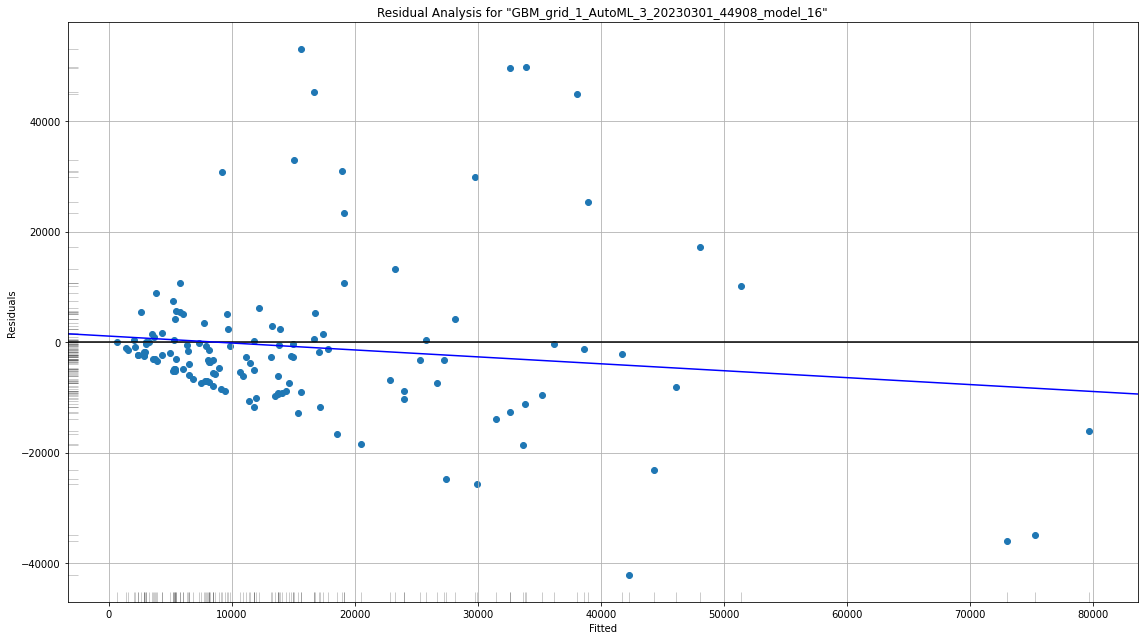

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

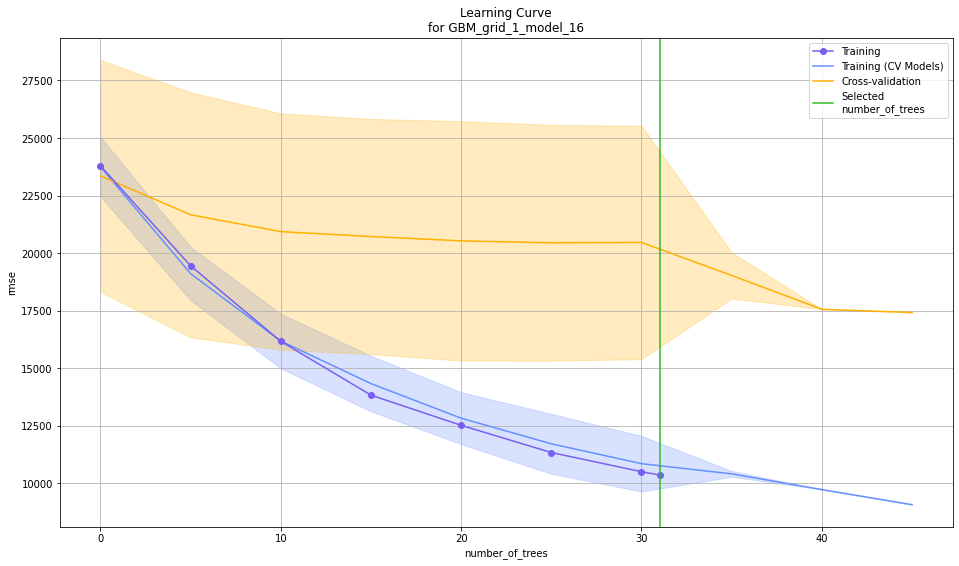

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

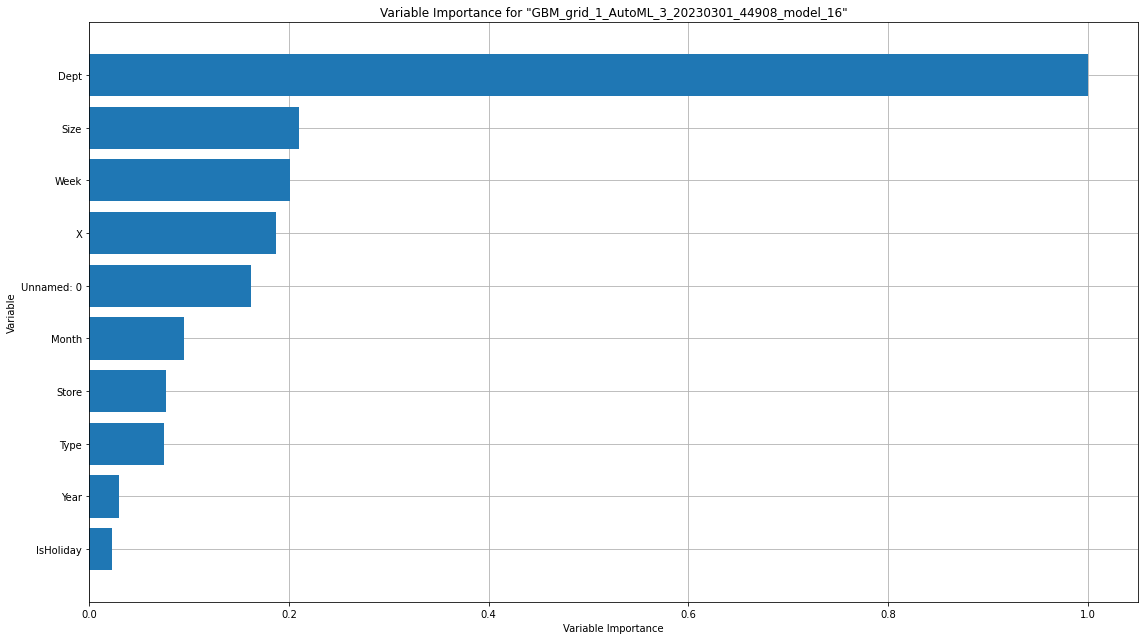

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

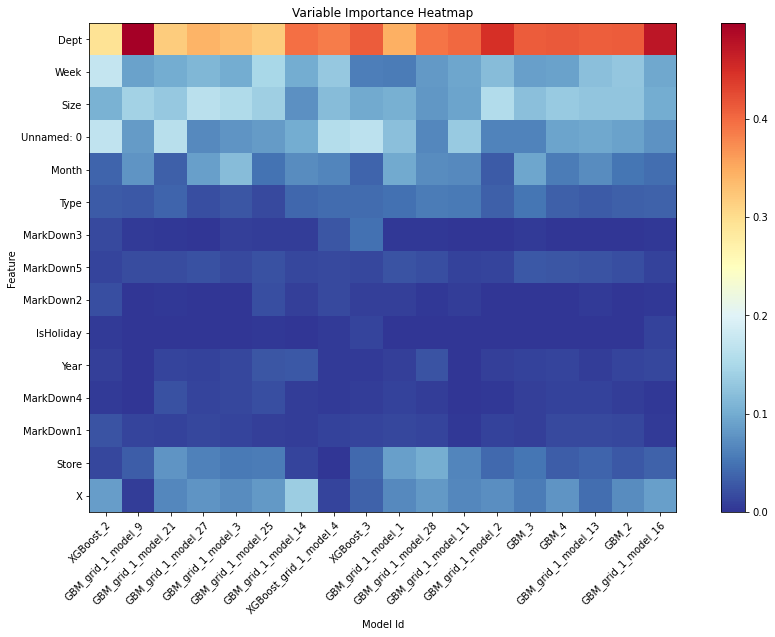

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

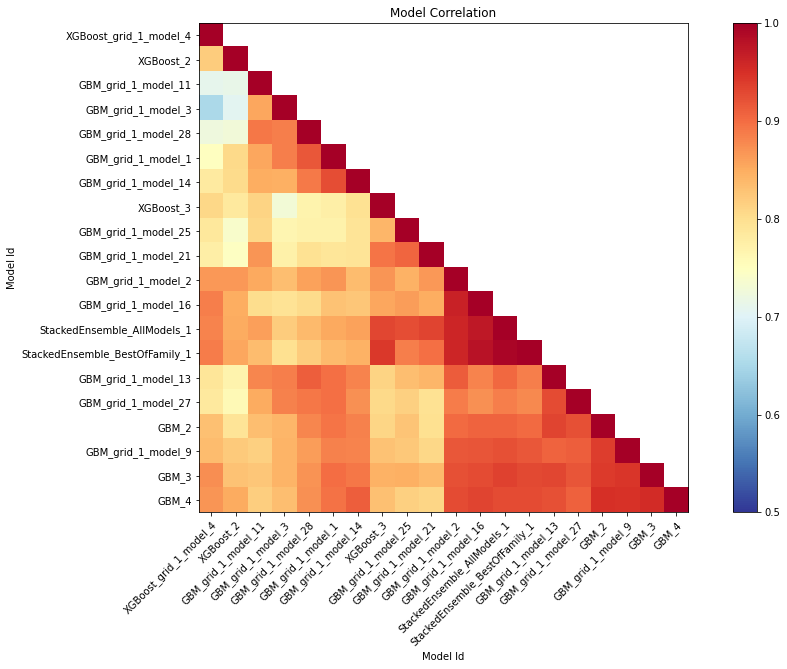

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

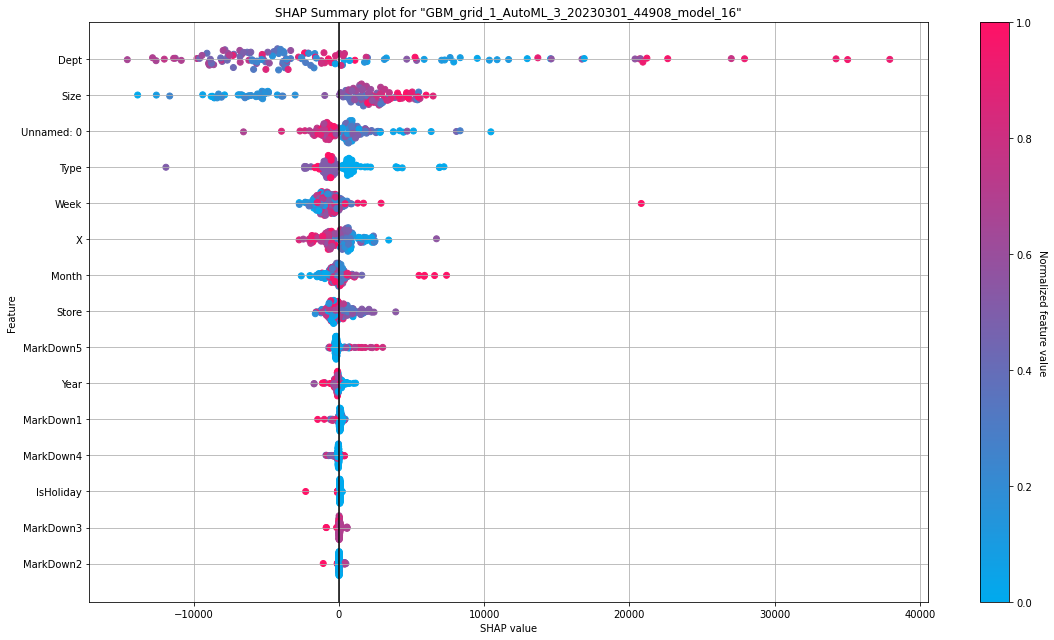

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

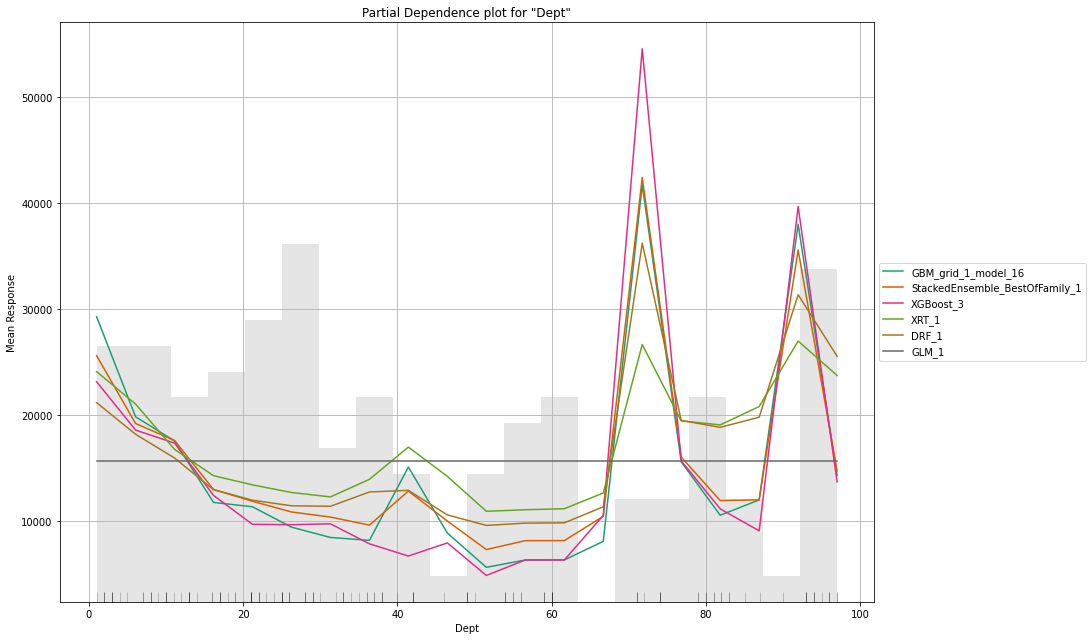

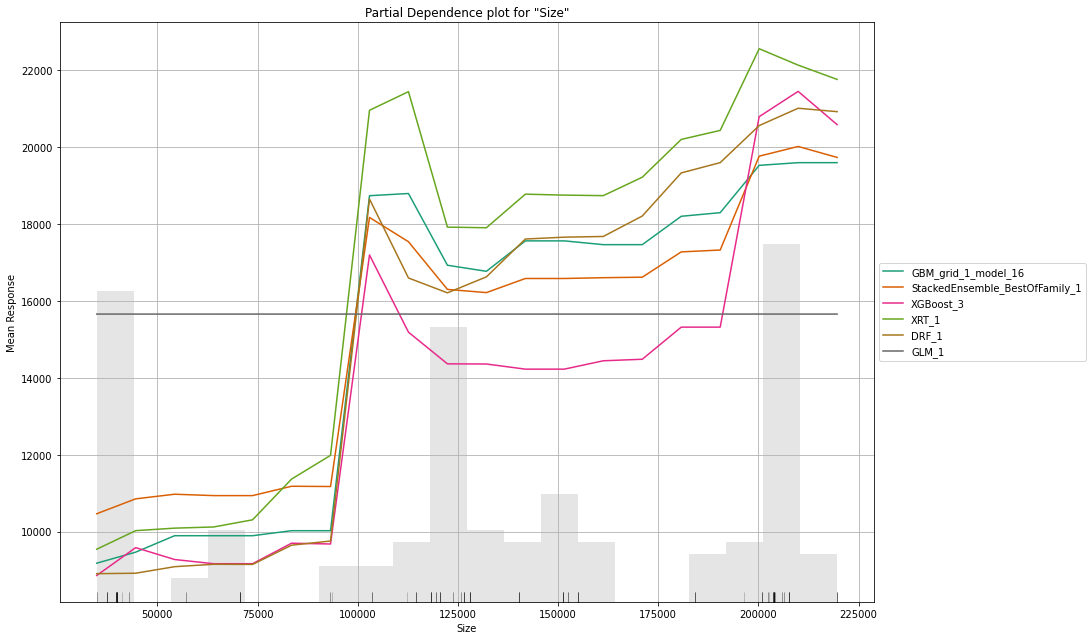

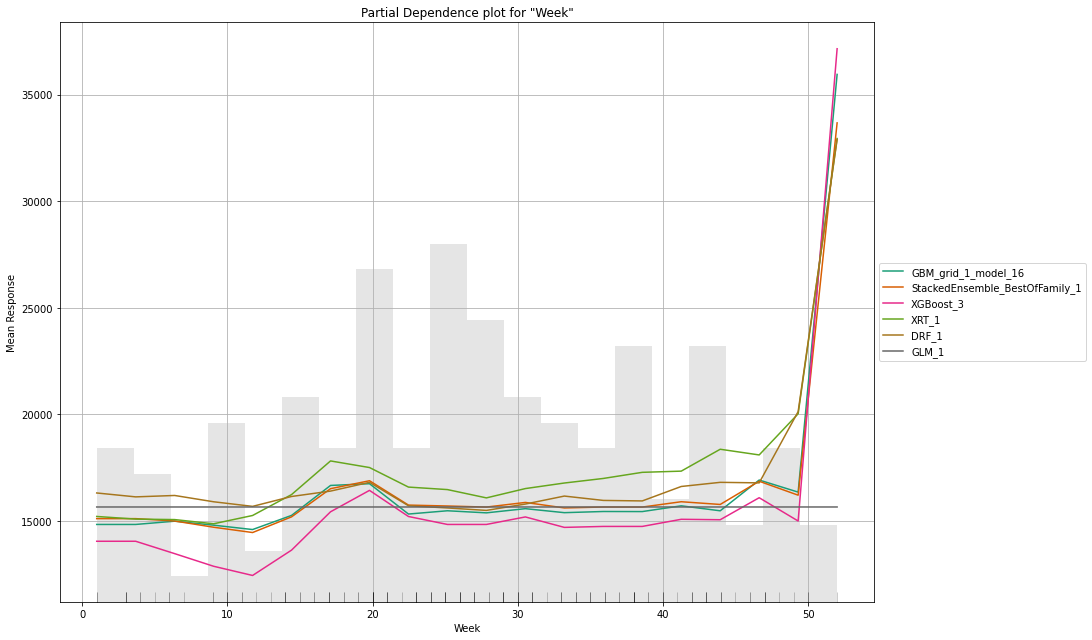

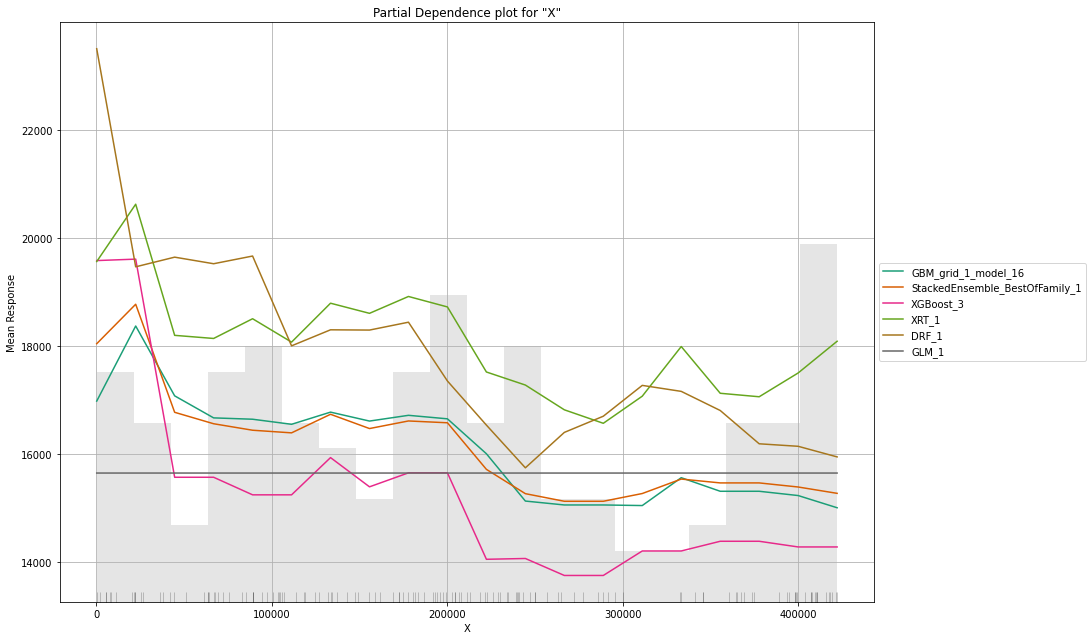

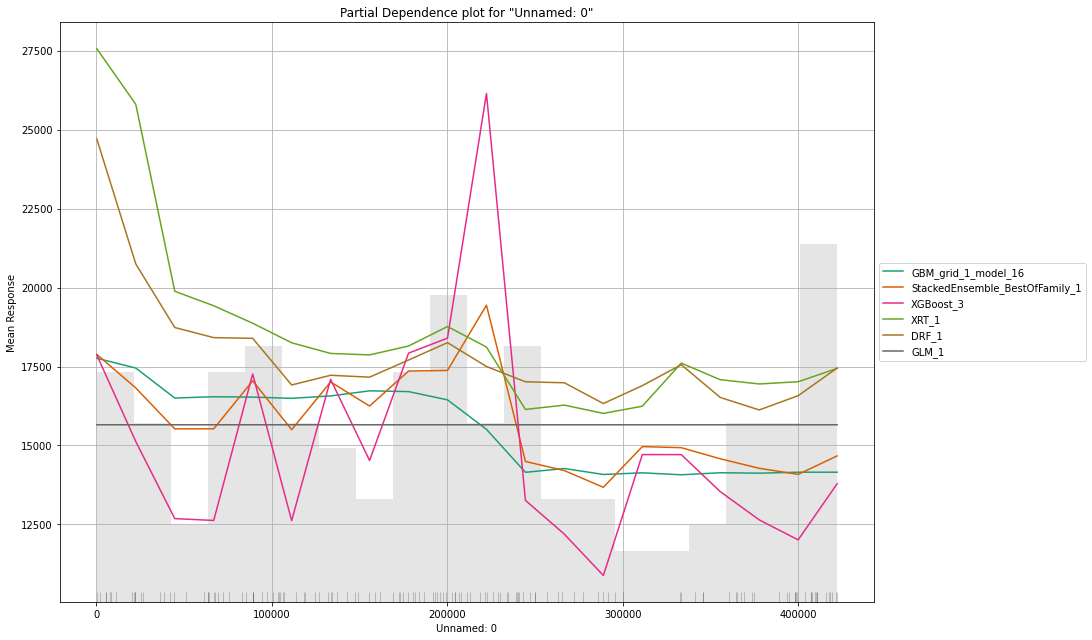

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

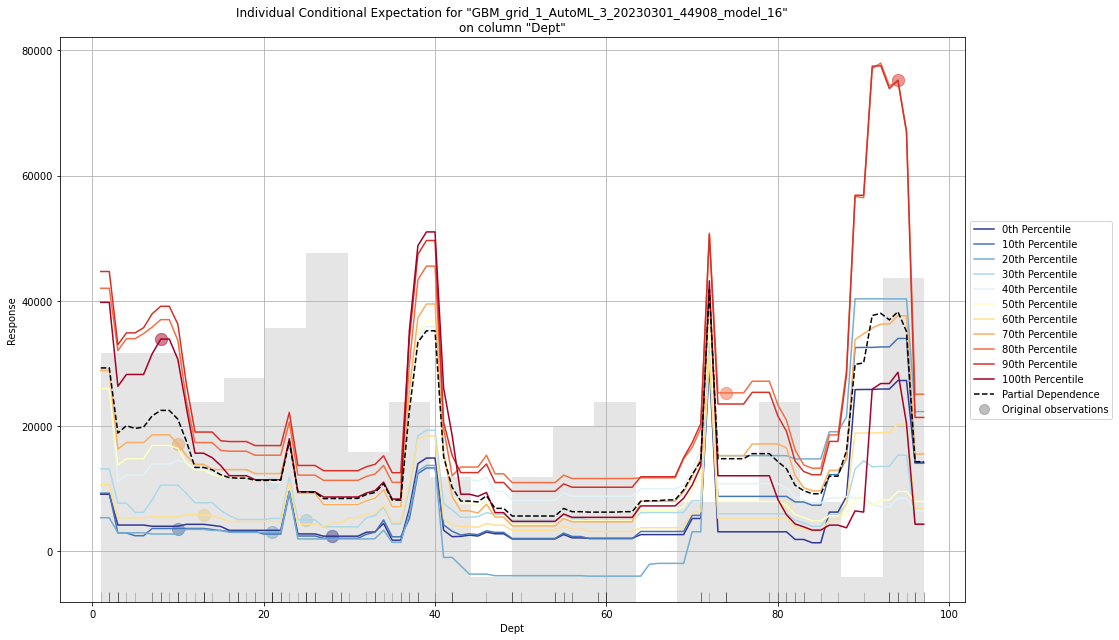

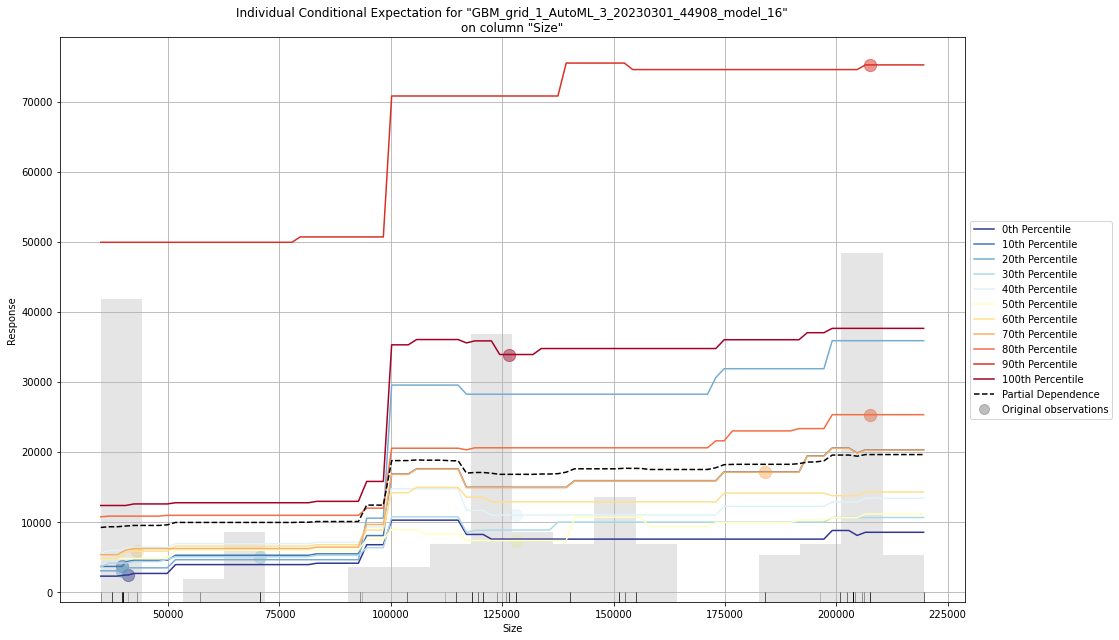

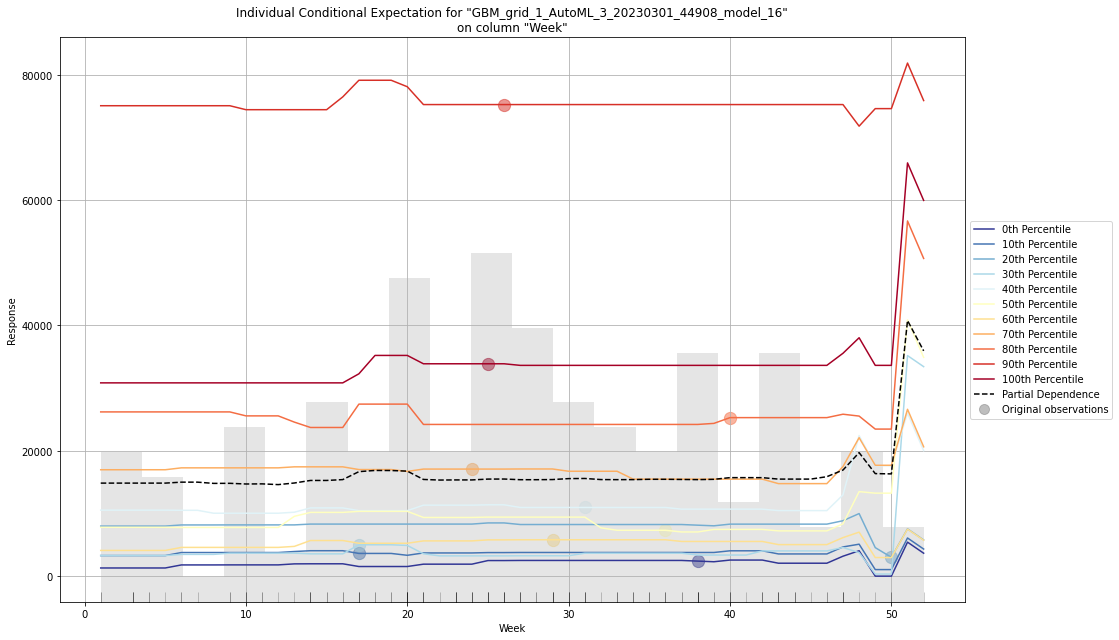

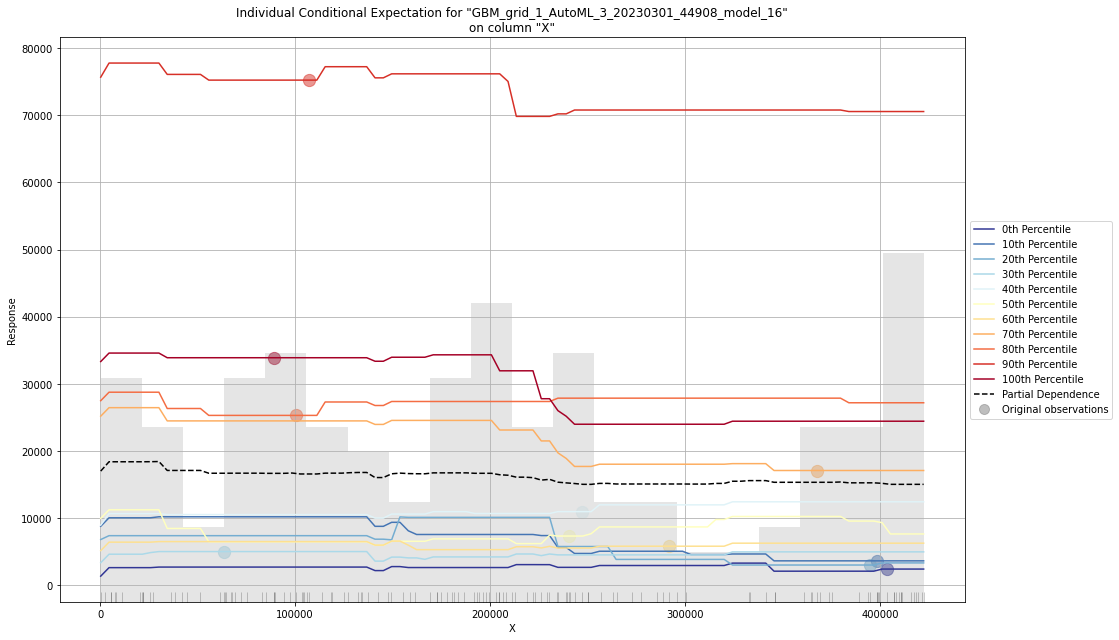

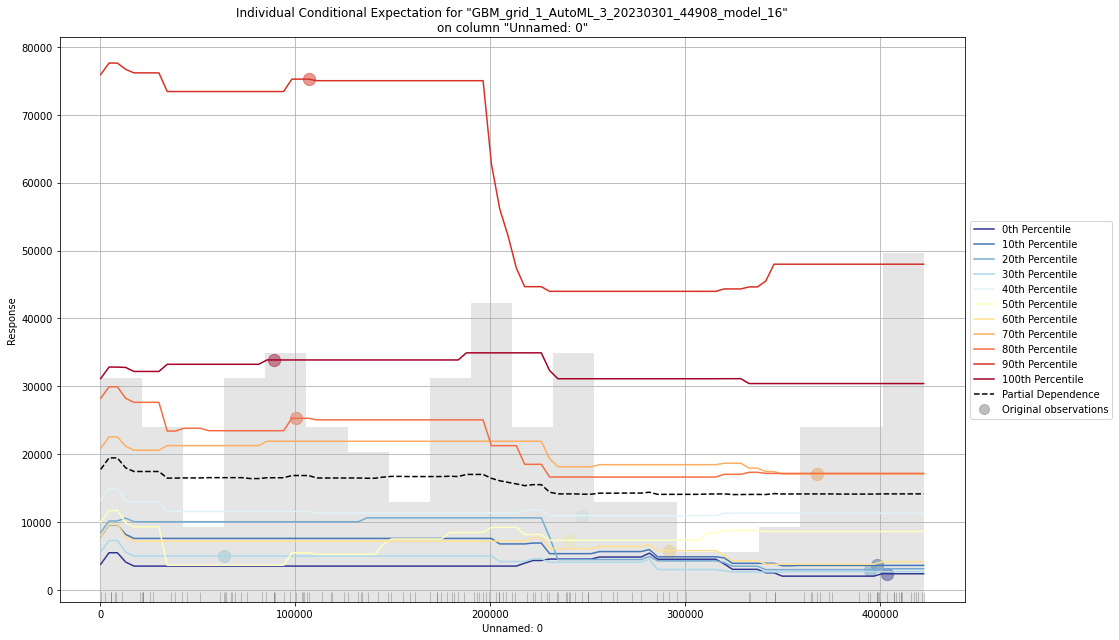

In [114]:
exa = aml.explain(df_test)

## In the multivariate models are predictor variables independent of all the other predictor variables?

In [115]:
import statsmodels.api as sm

model = sm.OLS(df_copy['Weekly_Sales'], df_copy[['Store', 'Dept','Size', 'Year', 'Month']].replace(',', '', regex = True).astype(float)).fit()


# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           Weekly_Sales   R-squared (uncentered):                   0.382
Model:                            OLS   Adj. R-squared (uncentered):              0.376
Method:                 Least Squares   F-statistic:                              61.20
Date:                Wed, 01 Mar 2023   Prob (F-statistic):                    1.29e-49
Time:                        04:50:55   Log-Likelihood:                         -5698.7
No. Observations:                 500   AIC:                                  1.141e+04
Df Residuals:                     495   BIC:                                  1.143e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Store       -139.5917     76.249     -1.831      0.068    -289.402      10.219
Dept          65.7827     32.241      2.040      0.042       2.437     129.128
Size           0.0897      0.016      5.520      0.000       0.058       0.122
Year          -0.5920      1.876     -0.316      0.752      -4.279       3.094
Month        755.0849    316.030      2.389      0.017     134.159    1376.011
==============================================================================
Omnibus:                      396.554   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8676.288
Skew:                           3.295   Prob(JB):                         0.00
Kurtosis:                      22.314   Cond. No.                     4.78e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Which hyperparameters are important?

In [116]:
from h2o.grid.grid_search import H2OGridSearch
glm_parameters = {
    "learn_rate": [i * 0.01 for i in range(1, 11)],
    "max_depth": list(range(2, 11)),
    "sample_rate": [i * 0.1 for i in range(5, 11)],
    "col_sample_rate": [i * 0.1 for i in range(1, 11)],
}

search_criteria = {"strategy": "RandomDiscrete", "max_models": 30, "seed": 1}
glm_grid = H2OGridSearch(
    model=H2OGradientBoostingEstimator,
    grid_id="gbm_grid_search",
    hyper_params=glm_parameters,
    search_criteria=search_criteria,
)

glm_grid.train(x=x, y=y, training_frame=df_train, ntrees=100, seed=1)

gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


,col_sample_rate,learn_rate,max_depth,sample_rate,model_ids,residual_deviance
,0.5,0.1,9.0,1.0,gbm_grid_search_model_7,33597864.1865451
,0.5,0.1,9.0,1.0,gbm_grid_search_model_37,39219369.3533641
,0.5,0.1,9.0,1.0,gbm_grid_search_model_67,66448602.3468070
,0.4,0.08,6.0,0.9,gbm_grid_search_model_28,77575982.9138672
,0.9,0.09,9.0,0.6000000,gbm_grid_search_model_3,80585244.1317602
,0.6000000,0.1,4.0,1.0,gbm_grid_search_model_22,84431531.0389339
,0.4,0.08,6.0,0.9,gbm_grid_search_model_58,89492625.1844143
,0.9,0.09,9.0,0.6000000,gbm_grid_search_model_33,90836205.0163979
,0.6000000,0.1,4.0,1.0,gbm_grid_search_model_52,93657701.3903031
,0.5,0.05,7.0,0.9,gbm_grid_search_model_2,95825152.9770314


In [117]:
gbm_gridperf2 = glm_grid.get_grid(sort_by="residual_deviance", decreasing = True)
print(gbm_gridperf2)

Hyper-Parameter Search Summary: ordered by decreasing residual_deviance
     col_sample_rate      learn_rate    max_depth    sample_rate         model_ids                 residual_deviance
---  -------------------  ------------  -----------  ------------------  ------------------------  -------------------
     1.0                  0.01          2.0          0.5                 gbm_grid_search_model_83  480294808.2845045
     1.0                  0.01          2.0          0.7000000000000001  gbm_grid_search_model_70  477097719.66564316
     0.30000000000000004  0.02          2.0          1.0                 gbm_grid_search_model_80  452798459.3305732
     0.1                  0.02          9.0          0.8                 gbm_grid_search_model_76  419630939.9173188
     0.5                  0.03          2.0          0.6000000000000001  gbm_grid_search_model_86  419491161.08392453
     0.2                  0.02          10.0         0.5                 gbm_grid_search_model_85  390500

In [118]:
#h2o.cluster().shutdown()

Q1 Is the relationship significant?

-> After conducting a statistical analysis to determine the significance of relationship to the target variable(Weekly_Sales), only 3 predictor variables have a p-value below 0.05 (dept, size, year)

Q2- Are any model assumptions violated?

-> no, the model is a multiclassification which make sense to all models in AutoML

Q3- Is there any multicollinearity in the model?

ANS- YES, 
Multi collinearity refers to the strong relationship or correlation between to input variables. There is said to be multi collinearity between two variables if there exist a correlation coefficient of more than 0.80. It is important to remove such variables as this leads to an inflated variance in the model which also increases the error in the model.In the heatmap it is evident that some features are highly dependent on other features.

Q4- In the multivariate models are predictor variables independent of all the other predictor variables? 

->
NO, 
We can see from the above plots that some predictor variables are dependent on the others and we have dropped some(OLS, correlation and the heatmap)

Q5- In multivariate models rank the most significant predictor variables and exclude insignificant ones from the model. 

-> Done

Q6 - Does the model make sense?

-> Yes the model makes sense. 
the question is a multiclassfication question and models in AutoML can deal with it. 

Q7- Does regularization help?

-> Yes, 
Regularization techniques are designed to reduce the complexity of a model, thereby reducing the risk of overfitting and improving its generalization performance.
We can see improvement in MSE and RMSE across the lasso and ridge regularization,though both methods do not have a significant difference. We can conclude that any of the regularization techniques will help for a linear model


Q8 - Which independent variables are significant 

-> From all the tests done there are only 2 significant independent variables; dept, size.

Q9 - Which hyperparameters are important?

-> All hyperparameters are important because they determined the way model works, however, there are some more important one, such as booster,max_depth, ntrees in XGBOOST 



# Conclusion



*  Accurate prediction models can be created with H2O AutoML without the need for human hyperparameter tuning and optimization.
*  I discovered that H2O AutoML can handle both numerical and categorical data and supports a wide range of supervised learning tasks, including classification and regression.
*  To forecast consumer satisfaction with an airline using specific attributes, a predictive model was built using H2O AutoML.
*  learned the significance of variables conducted research on the impacts of Ridge and LASSO regularization, and it was successfully applied.
*  Applied the Random Grid Search Algorithm to the tuning of the hyperparameters.





# References
*   https://towardsdatascience.com/a-deep-dive-into-h2os-automl-4b1fe51d3f3e
*   https://docs.h2o.ai/h2o/latest-stable/h2o-docs/grid-search.html
*   Pandas Documentation
*   Sklearn Documentation
*   A Complete Guide to Dealing with Missing values in Python




**LICENSE**

MIT License

Copyright (c) 2023 Nishank Dave

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.